In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re 
import glob
from collections import Counter

### häufigste Wortfrequenz nach Modalwert

In [2]:
def tokenize(lines, pattern=re.compile(r'\p{L}+')):
    """

    :param lines: object to be tokenized, e.g. file
    :param pattern: pattern to tokenize 'lines'
    :return: lowered and tokenized string
    """
    for line in lines:
        yield from map(str.lower, pattern.findall(line))

#anderer Tokenizer ?
# def remove_stopwords(tokens):
#     return (token for token in tokenize(tokens) if token not in set(stopwords.words('german')))


def wordcounts_in_file(file):
    """

    :param file: filename of file to be analyzed
    :return: Counter of tokenized file
    """
    with open(file, encoding='utf-8') as f:
        # return Counter(remove_stopwords(f))
        return Counter(tokenize(f))


def word2freq(counts):
    """

    :param counts: a Counter from a file to be analyzed
    :return: list of each words and their frequencies
    """
    words = []
    freq = []
    for c in counts:
        words.append(c)
        freq.append(counts[c])
    return words, freq


def create_pd_series():
    """

    :param path: path to files
    :param prefix: prefix to remove from filename for further use in Series
    :return: list of pd.Series with words and wordcounts per file
    """
    freq_list = []
    for file in glob.glob(path):
        filename = file.replace(prefix, '')
        counts = wordcounts_in_file(file)
        words, freq = word2freq(counts)
        freq_list.append(pd.Series(freq, words, name=filename))
        print(filename)  # später löschen
    return freq_list


def create_dataframe(series):
    """

    :param series: list of pd.Series, created e.g. with create_pd_series()
    :param mfw: value of most frequent words
    :return: document-term-matrix as pd.Dataframe with zscores
    """
    df = pd.DataFrame(series)
    df = df.fillna(0)

  #  df = df.div(df.sum(axis=1), axis=0)

    df.loc['Total_per_word'] = df.sum()
    df = df.sort_values(by='Total_per_word', axis=1, ascending=False)
    return df

In [45]:
path = "project_stylometry_statistics/dataset/refcor-master/Chinese/*.txt"
prefix = "project_stylometry_statistics/dataset/refcor-master/"
freqs = create_pd_series()

Chinese/BiShuMin,HuaGuanBingDu,seg.txt
Chinese/QianZhongshu,XieZaiRenShengBianShang,seg.txt
Chinese/ZhouGuoping,ShouWangDeJuLi,seg.txt
Chinese/LiuXinwu,ZhongGuLou,seg.txt
Chinese/ZhouGuoping,BaoBeiBaoBei,seg.txt
Chinese/LongYingtai,AShangHaiNanRen,seg.txt
Chinese/SuTong,HeAn,seg.txt
Chinese/LuXun,NaHan,seg.txt
Chinese/Muxin,TongQingZhongDuanLu,seg.txt
Chinese/SanMao,NaoXueJi,seg.txt
Chinese/ChenZhongshi,ChuXia,seg.txt
Chinese/SanMao,SaHaLaDeGuShi,seg.txt
Chinese/BoYang,HongXiuJi,seg.txt
Chinese/QianZhongshu,DuanPianJi,seg.txt
Chinese/BiShuMin,KunLunShang,seg.txt
Chinese/QianZhongshu,WeiCheng,seg.txt
Chinese/WangXiaoBo,WoDeYinYangLiangJie,seg.txt
Chinese/Muxin,QiongMeiKaSuiXiangLu,seg.txt
Chinese/BaJin,Qiu,seg.txt
Chinese/MoYan,ShiCaoJiaZu,seg.txt
Chinese/YanGelin,LvXie,seg.txt
Chinese/LongYingtai,ZheGeDongDangDeShiJie,seg.txt
Chinese/JiXianlin,NiuPengZaYi,seg.txt
Chinese/JiXianlin,TanRenSheng,seg.txt
Chinese/LuXun,ZhaoHuaXiShi,seg.txt
Chinese/JiaPingwa,GuLu,seg.txt
Chinese/ChenZhongshi

In [46]:
fre = create_dataframe(freqs)
fre

,的,了,一,我,他,是,不,在,说,你,...,树啦,智简,monikamotsch,塞尔望,sylvieservanschreiber,叶子嫩,还苫,第次,老哩,黑绳套
"Chinese/BiShuMin,HuaGuanBingDu,seg.txt",1962.0,621.0,494.0,533.0,173.0,686.0,508.0,321.0,497.0,336.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chinese/QianZhongshu,XieZaiRenShengBianShang,seg.txt",908.0,201.0,181.0,151.0,99.0,304.0,215.0,114.0,130.0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chinese/ZhouGuoping,ShouWangDeJuLi,seg.txt",6020.0,972.0,1634.0,1007.0,871.0,1847.0,1106.0,929.0,279.0,190.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chinese/LiuXinwu,ZhongGuLou,seg.txt",8001.0,3064.0,3112.0,1043.0,2487.0,2219.0,1723.0,1268.0,918.0,973.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chinese/ZhouGuoping,BaoBeiBaoBei,seg.txt",2451.0,1157.0,1125.0,1208.0,92.0,1054.0,547.0,715.0,634.0,284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Chinese/WangShuo,WanDeJiuShiXinTiao,seg.txt",3644.0,1712.0,1674.0,3641.0,786.0,1398.0,1327.0,967.0,1074.0,1493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chinese/YanGelin,DaoTangHe,seg.txt",1038.0,522.0,495.0,1248.0,314.0,327.0,357.0,266.0,199.0,327.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chinese/YanGelin,LuFanYanShi,seg.txt",10484.0,4488.0,4026.0,817.0,4434.0,2857.0,2235.0,1810.0,984.0,812.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Chinese/MoYan,Wa,seg.txt",5687.0,2249.0,1963.0,3345.0,1099.0,1960.0,1121.0,830.0,1240.0,1364.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
summe = fre.loc['Total_per_word'].sum()
summe

7233933.0

In [48]:
df = pd.DataFrame(fre.loc['Total_per_word'].value_counts().tolist()/summe)
df.index = fre.loc['Total_per_word'].value_counts().index
df = df[:3]
df['corpus'] = 'Chinese'
df

,0,corpus
1.0,0.014764,Chinese
2.0,0.003486,Chinese
3.0,0.001655,Chinese


In [95]:
#all_modal = pd.DataFrame()
#all_modal = pd.concat([all_modal, df])
all_modal = pd.read_csv('most_freq_frequencies')

In [111]:
all_modal = all_modal.rename(columns={"Unnamed: 0.1": "Frequency", "0": "relative occurence"})

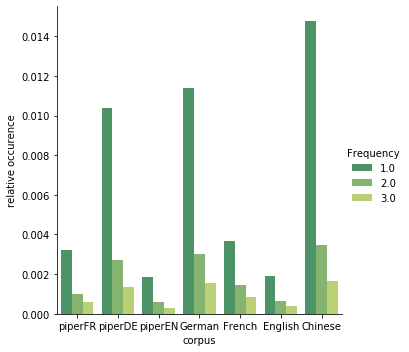

In [117]:
#sns.catplot(x='corpus', hue=all_modal.index, data=all_modal)
sns.catplot(x="corpus", y="relative occurence", hue="Frequency", kind="bar", data=all_modal, palette="summer")
plt.savefig('most_freq_frequencies')

### most frequent words with and without stopwords by relative frequencies

In [175]:
huber = df.copy()
huber = huber[huber['Unnamed: 0'].str.contains('Huber')]
# goethe.loc['Summe'] = goethe.sum()
huber.index = huber['Unnamed: 0']
huber.drop('Unnamed: 0', inplace=True, axis=1)
huber.loc['Summen'] = (huber.sum(axis=0))
huber

,johanna,schopenhauer,richard,wood,roman,die,zeit,ist,aus,den,...,männinnen,fortwankte,beschwemmtem,allzuzärtlichen,gemütsfassung,cœtera,intus,fortzulesen,tractats,Total_per_text
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
"Huber,-Therese_Ellen Percy.txt",0.0,0.0,0.0,0.0,1.0,1979.0,101.0,206.0,234.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88652.0
"Huber,-Therese_Die Familie Seldorf.txt",0.0,0.0,0.0,0.0,0.0,2271.0,84.0,167.0,289.0,1128.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92403.0
"Huber,-Therese_Luise.txt",0.0,0.0,0.0,0.0,1.0,860.0,56.0,64.0,126.0,354.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39312.0
Summen,0.0,0.0,0.0,0.0,2.0,5110.0,241.0,437.0,649.0,2327.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220367.0


In [176]:
komplett = huber['Total_per_text']['Summen']
huber.drop('Total_per_text', axis=1, inplace=True)
huber = huber.T
huber['rel_sum'] = huber['Summen']/komplett
huber = huber.sort_values(by=['rel_sum'], ascending=False)
#huber = huber[:20]   # uncomment for vis
huber.T

,und,sie,die,zu,der,in,ich,er,mit,den,...,abthut,schmerzensruf,schossenden,überdecken,gnadenvoll,wechselt,spender,riesenstrauß,hochgeschwollenen,tractats
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
"Huber,-Therese_Ellen Percy.txt",1976.000000,1672.000000,1979.000000,2137.000000,1602.000000,1263.000000,2464.000000,718.000000,975.000000,845.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Huber,-Therese_Die Familie Seldorf.txt",2919.000000,2375.000000,2271.000000,1555.000000,2070.000000,1391.000000,459.000000,1514.000000,1079.000000,1128.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Huber,-Therese_Luise.txt",959.000000,1562.000000,860.000000,1097.000000,608.000000,505.000000,82.000000,533.000000,339.000000,354.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,5854.000000,5609.000000,5110.000000,4789.000000,4280.000000,3159.000000,3005.000000,2765.000000,2393.000000,2327.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rel_sum,0.026565,0.025453,0.023189,0.021732,0.019422,0.014335,0.013636,0.012547,0.010859,0.01056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
with open('de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_h = huber.copy().T
for x in ohne_stop_h:
    if x in stopwords:
        ohne_stop_h.drop(x, axis=1, inplace=True)
ohne_stop_h

,sara,mutter,miß,vater,herz,rief,luise,ward,schien,jezt,...,abthut,schmerzensruf,schossenden,überdecken,gnadenvoll,wechselt,spender,riesenstrauß,hochgeschwollenen,tractats
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
"Huber,-Therese_Ellen Percy.txt",0.000000,127.000000,352.000000,120.000000,68.000000,125.00000,0.000000,138.00000,102.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Huber,-Therese_Die Familie Seldorf.txt",739.000000,86.000000,0.000000,170.000000,160.000000,138.00000,0.000000,90.00000,140.000000,229.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Huber,-Therese_Luise.txt",0.000000,237.000000,0.000000,35.000000,55.000000,19.00000,280.000000,43.00000,28.000000,13.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,739.000000,450.000000,352.000000,325.000000,283.000000,282.00000,280.000000,271.00000,270.000000,242.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rel_sum,0.003353,0.002042,0.001597,0.001475,0.001284,0.00128,0.001271,0.00123,0.001225,0.001098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
ohne_stop_h = ohne_stop_h.T
ohne_stop_h = ohne_stop_h.sort_values(by=['rel_sum'], ascending=False)
ohne_stop_h = ohne_stop_h[:20]

In [179]:
ohne_stop_h

Unnamed: 0,"Huber,-Therese_Ellen Percy.txt","Huber,-Therese_Die Familie Seldorf.txt","Huber,-Therese_Luise.txt",Summen,rel_sum
sara,0.0,739.0,0.0,739.0,0.003353
mutter,127.0,86.0,237.0,450.0,0.002042
miß,352.0,0.0,0.0,352.0,0.001597
vater,120.0,170.0,35.0,325.0,0.001475
herz,68.0,160.0,55.0,283.0,0.001284
rief,125.0,138.0,19.0,282.0,0.001280
luise,0.0,0.0,280.0,280.0,0.001271
ward,138.0,90.0,43.0,271.0,0.001230
schien,102.0,140.0,28.0,270.0,0.001225
jezt,0.0,229.0,13.0,242.0,0.001098


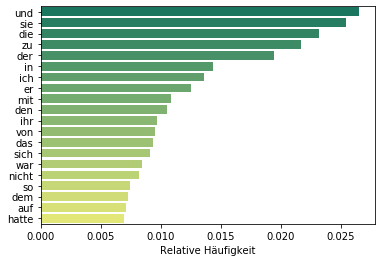

In [70]:
ax = sns.barplot(x=huber['rel_sum'], y=huber.index, data=huber, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('MFW_Huber_mit_stop')

In [152]:
df[df['Unnamed: 0'].str.contains('Huber')]['mutter']

9     127.0
35     86.0
61    237.0
Name: mutter, dtype: float64

In [144]:
wassermann = df.copy()
wassermann = wassermann[wassermann['Unnamed: 0'].str.contains('Wassermann')]
# # goethe.loc['Summe'] = goethe.sum()
wassermann.index = wassermann['Unnamed: 0']
wassermann.drop('Unnamed: 0', inplace=True, axis=1)
wassermann.loc['Summen'] = (wassermann.sum(axis=0))
wassermann

,johanna,schopenhauer,richard,wood,roman,die,zeit,ist,aus,den,...,männinnen,fortwankte,beschwemmtem,allzuzärtlichen,gemütsfassung,cœtera,intus,fortzulesen,tractats,Total_per_text
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
"Wassermann,-Jakob_Das Gaensemaennchen.txt",0.0,0.0,3.0,0.0,2.0,4560.0,144.0,710.0,558.0,1926.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160167.0
"Wassermann,-Jakob_Die Juden von Zirndorf.txt",0.0,0.0,1.0,0.0,0.0,2366.0,80.0,414.0,314.0,1058.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81080.0
"Wassermann,-Jakob_Christian Wahnschaffe.txt",181.0,0.0,2.0,0.0,5.0,6518.0,225.0,1564.0,918.0,2733.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244661.0
Summen,181.0,0.0,6.0,0.0,7.0,13444.0,449.0,2688.0,1790.0,5717.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,485908.0


In [145]:
komplett = wassermann['Total_per_text']['Summen']
wassermann.drop('Total_per_text', axis=1, inplace=True)
wassermann = wassermann.T
wassermann['rel_sum'] = wassermann['Summen']/komplett
wassermann = wassermann.sort_values(by=['rel_sum'], ascending=False)
wassermann = wassermann[:20]
wassermann.T

,und,die,sie,der,er,in,zu,sich,das,den,es,war,mit,nicht,ich,ein,von,auf,an,dem
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
"Wassermann,-Jakob_Das Gaensemaennchen.txt",6017.00000,4560.000000,3759.000000,3527.000000,3533.000000,2414.000000,2095.000000,2041.000000,1867.000000,1926.000000,1738.000000,1769.000000,1588.000000,1490.00000,1044.000000,1458.000000,1272.000000,1293.000000,1193.000000,1025.0000
"Wassermann,-Jakob_Die Juden von Zirndorf.txt",3395.00000,2366.000000,1409.000000,1919.000000,1582.000000,1205.000000,1026.000000,966.000000,974.000000,1058.000000,755.000000,726.000000,820.000000,651.00000,630.000000,866.000000,636.000000,627.000000,485.000000,494.0000
"Wassermann,-Jakob_Christian Wahnschaffe.txt",8586.00000,6518.000000,6276.000000,4868.000000,4955.000000,3562.000000,3059.000000,3151.000000,2991.000000,2733.000000,3029.000000,2580.000000,2442.000000,2655.00000,3084.000000,2369.000000,2170.000000,1918.000000,1630.000000,1542.0000
Summen,17998.00000,13444.000000,11444.000000,10314.000000,10070.000000,7181.000000,6180.000000,6158.000000,5832.000000,5717.000000,5522.000000,5075.000000,4850.000000,4796.00000,4758.000000,4693.000000,4078.000000,3838.000000,3308.000000,3061.0000
rel_sum,0.03704,0.027668,0.023552,0.021226,0.020724,0.014779,0.012718,0.012673,0.012002,0.011766,0.011364,0.010444,0.009981,0.00987,0.009792,0.009658,0.008393,0.007899,0.006808,0.0063


In [172]:
with open('de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_w = wassermann.copy().T
for x in ohne_stop_w:
    if x in stopwords:
        ohne_stop_w.drop(x, axis=1, inplace=True)
ohne_stop_w

In [82]:
ohne_stop_w = ohne_stop_w.T
ohne_stop_w = ohne_stop_w.sort_values(by=['rel_sum'], ascending=False)
ohne_stop_w = ohne_stop_w[:20]

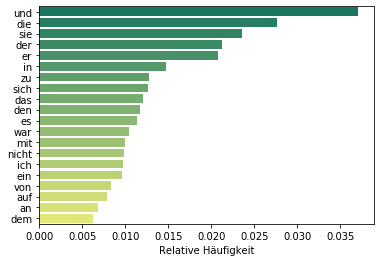

In [86]:
ax = sns.barplot(x=wassermann['rel_sum'], y=wassermann.index, data=wassermann, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('MFW_Wassermann_mit_stop')

In [89]:
df

,Unnamed: 0,johanna,schopenhauer,richard,wood,roman,die,zeit,ist,aus,...,männinnen,fortwankte,beschwemmtem,allzuzärtlichen,gemütsfassung,cœtera,intus,fortzulesen,tractats,Total_per_text
0,"Schopenhauer,-Johanna_Richard Wood.txt",1.0,1.0,679.0,46.0,2.0,2196.0,197.0,491.0,407.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112359.0
1,"Kafka,-Franz_Amerika.txt",1.0,0.0,0.0,0.0,1.0,1975.0,91.0,418.0,319.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83807.0
2,"Francois,-Louise-von_Stufenjahre eines Glueckl...",0.0,0.0,0.0,0.0,2.0,4285.0,143.0,748.0,586.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163886.0
3,"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",0.0,0.0,0.0,0.0,1.0,333.0,16.0,81.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19818.0
4,"Wassermann,-Jakob_Das Gaensemaennchen.txt",0.0,0.0,3.0,0.0,2.0,4560.0,144.0,710.0,558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,"Raabe,-Wilhelm_Im alten Eisen.txt",0.0,0.0,0.0,0.0,0.0,1211.0,67.0,342.0,317.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54511.0
73,"Lewald,-Fanny_Jenny.txt",0.0,0.0,10.0,0.0,0.0,2429.0,84.0,505.0,237.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95492.0
74,"Raabe,-Wilhelm_Stopfkuchen Eine See- und Mordg...",0.0,0.0,0.0,0.0,0.0,1218.0,73.0,365.0,271.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63467.0
75,"Schopenhauer,-Johanna_Die Tante.txt",1.0,1.0,0.0,0.0,6.0,2592.0,194.0,424.0,372.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122420.0


In [141]:
drei = df.copy()
drei = drei[drei['Unnamed: 0'].str.contains('Kafka')]
# # goethe.loc['Summe'] = goethe.sum()
drei.index = drei['Unnamed: 0']
drei.drop('Unnamed: 0', inplace=True, axis=1)
drei.loc['Summen'] = (drei.sum(axis=0))
drei

,johanna,schopenhauer,richard,wood,roman,die,zeit,ist,aus,den,...,männinnen,fortwankte,beschwemmtem,allzuzärtlichen,gemütsfassung,cœtera,intus,fortzulesen,tractats,Total_per_text
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
"Kafka,-Franz_Amerika.txt",1.0,0.0,0.0,0.0,1.0,1975.0,91.0,418.0,319.0,960.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83807.0
"Kafka,-Franz_Der Prozess.txt",0.0,0.0,0.0,0.0,1.0,1682.0,104.0,537.0,225.0,867.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71770.0
"Kafka,-Franz_Das Schloss.txt",0.0,0.0,0.0,0.0,0.0,2447.0,90.0,1011.0,364.0,1031.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109093.0
Summen,1.0,0.0,0.0,0.0,2.0,6104.0,285.0,1966.0,908.0,2858.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264670.0


In [142]:
komplett = drei['Total_per_text']['Summen']
drei.drop('Total_per_text', axis=1, inplace=True)
drei = drei.T
drei['rel_sum'] = drei['Summen']/komplett
drei = drei.sort_values(by=['rel_sum'], ascending=False)
drei = drei[:20]
drei

Unnamed: 0,"Kafka,-Franz_Amerika.txt","Kafka,-Franz_Der Prozess.txt","Kafka,-Franz_Das Schloss.txt",Summen,rel_sum
und,2476.0,1711.0,2929.0,7116.0,0.026886
die,1975.0,1682.0,2447.0,6104.0,0.023063
der,1966.0,1812.0,1964.0,5742.0,0.021695
er,1571.0,1657.0,1825.0,5053.0,0.019092
sie,1349.0,1353.0,2123.0,4825.0,0.018230
nicht,1120.0,1167.0,1986.0,4273.0,0.016145
zu,1174.0,1103.0,1678.0,3955.0,0.014943
es,904.0,1115.0,1860.0,3879.0,0.014656
ich,977.0,1005.0,1353.0,3335.0,0.012601
sich,1033.0,890.0,1203.0,3126.0,0.011811


In [131]:
with open('de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_d = drei.copy().T
for x in ohne_stop_d:
    if x in stopwords:
        ohne_stop_d.drop(x, axis=1, inplace=True)
ohne_stop_d

,karl,fragte,frieda,hand,zimmer,fast,mußte,klamm,barnabas,schien,...,kesselflickerfrau,hühnermausen,tulpengewinden,kauderwelsche,scharmuziren,bälger,betteltanz,parlirte,dieberei,tractats
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
"Kafka,-Franz_Amerika.txt",1107.000000,131.000000,0.000000,148.000000,114.000000,83.000000,89.000000,0.000000,0.00000,95.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Kafka,-Franz_Der Prozess.txt",1.000000,181.000000,0.000000,133.000000,97.000000,103.000000,85.000000,0.000000,0.00000,57.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Kafka,-Franz_Das Schloss.txt",0.000000,163.000000,427.000000,73.000000,108.000000,116.000000,109.000000,277.000000,254.00000,97.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,1108.000000,475.000000,427.000000,354.000000,319.000000,302.000000,283.000000,277.000000,254.00000,249.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rel_sum,0.004186,0.001795,0.001613,0.001338,0.001205,0.001141,0.001069,0.001047,0.00096,0.000941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
ohne_stop_dd = ohne_stop_d.copy().T
ohne_stop_dd = ohne_stop_dd.sort_values(by=['rel_sum'], ascending=False)
ohne_stop_dd = ohne_stop_dd[:20]
ohne_stop_dd

Unnamed: 0,"Kafka,-Franz_Amerika.txt","Kafka,-Franz_Der Prozess.txt","Kafka,-Franz_Das Schloss.txt",Summen,rel_sum
karl,1107.0,1.0,0.0,1108.0,0.004186
fragte,131.0,181.0,163.0,475.0,0.001795
frieda,0.0,0.0,427.0,427.0,0.001613
hand,148.0,133.0,73.0,354.0,0.001338
zimmer,114.0,97.0,108.0,319.0,0.001205
fast,83.0,103.0,116.0,302.0,0.001141
mußte,89.0,85.0,109.0,283.0,0.001069
klamm,0.0,0.0,277.0,277.0,0.001047
barnabas,0.0,0.0,254.0,254.0,0.000960
schien,95.0,57.0,97.0,249.0,0.000941


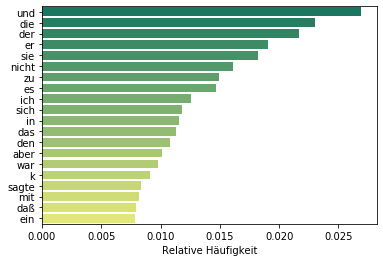

In [143]:
ax = sns.barplot(x=drei['rel_sum'], y=drei.index, data=drei, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('MFW_Kafka_mit_stop')

### number of words vs number of unique words

In [163]:
absolute = fre.copy()
absolute = absolute[:-1]
absolute
dicto = {}
for index, row in absolute.iterrows():
    i = 0
    liste = row.value_counts()
    liste = liste.drop(labels=[0.0])
    for x in liste:
        i = i+x
    dicto[row.name] = i
dicto

{'Chinese/BiShuMin,HuaGuanBingDu,seg.txt': 7695,
 'Chinese/QianZhongshu,XieZaiRenShengBianShang,seg.txt': 4564,
 'Chinese/ZhouGuoping,ShouWangDeJuLi,seg.txt': 10700,
 'Chinese/LiuXinwu,ZhongGuLou,seg.txt': 21933,
 'Chinese/ZhouGuoping,BaoBeiBaoBei,seg.txt': 7536,
 'Chinese/LongYingtai,AShangHaiNanRen,seg.txt': 14721,
 'Chinese/SuTong,HeAn,seg.txt': 7511,
 'Chinese/LuXun,NaHan,seg.txt': 7704,
 'Chinese/Muxin,TongQingZhongDuanLu,seg.txt': 9000,
 'Chinese/SanMao,NaoXueJi,seg.txt': 8446,
 'Chinese/ChenZhongshi,ChuXia,seg.txt': 9473,
 'Chinese/SanMao,SaHaLaDeGuShi,seg.txt': 7210,
 'Chinese/BoYang,HongXiuJi,seg.txt': 8517,
 'Chinese/QianZhongshu,DuanPianJi,seg.txt': 9556,
 'Chinese/BiShuMin,KunLunShang,seg.txt': 7139,
 'Chinese/QianZhongshu,WeiCheng,seg.txt': 16644,
 'Chinese/WangXiaoBo,WoDeYinYangLiangJie,seg.txt': 15878,
 'Chinese/Muxin,QiongMeiKaSuiXiangLu,seg.txt': 6557,
 'Chinese/BaJin,Qiu,seg.txt': 13392,
 'Chinese/MoYan,ShiCaoJiaZu,seg.txt': 18338,
 'Chinese/YanGelin,LvXie,seg.txt': 1

In [164]:
unique = pd.DataFrame(dicto.items(), columns=['text', 'unique'])
unique

,text,unique
0,"Chinese/BiShuMin,HuaGuanBingDu,seg.txt",7695
1,"Chinese/QianZhongshu,XieZaiRenShengBianShang,s...",4564
2,"Chinese/ZhouGuoping,ShouWangDeJuLi,seg.txt",10700
3,"Chinese/LiuXinwu,ZhongGuLou,seg.txt",21933
4,"Chinese/ZhouGuoping,BaoBeiBaoBei,seg.txt",7536
...,...,...
70,"Chinese/WangShuo,YiBanShiHuoYanYiBanShiHaiShui...",6504
71,"Chinese/WangShuo,WanDeJiuShiXinTiao,seg.txt",13579
72,"Chinese/YanGelin,DaoTangHe,seg.txt",5573
73,"Chinese/YanGelin,LuFanYanShi,seg.txt",20117


In [187]:
sums = fre.sum(axis=1).astype(int)
sums = sums.drop(labels=['Total_per_word'])
unique['Total'] = sums.to_list()
unique

,text,unique,Total
0,"Chinese/BiShuMin,HuaGuanBingDu,seg.txt",7695,33560
1,"Chinese/QianZhongshu,XieZaiRenShengBianShang,s...",4564,14381
2,"Chinese/ZhouGuoping,ShouWangDeJuLi,seg.txt",10700,75837
3,"Chinese/LiuXinwu,ZhongGuLou,seg.txt",21933,150816
4,"Chinese/ZhouGuoping,BaoBeiBaoBei,seg.txt",7536,45863
...,...,...,...
70,"Chinese/WangShuo,YiBanShiHuoYanYiBanShiHaiShui...",6504,26443
71,"Chinese/WangShuo,WanDeJiuShiXinTiao,seg.txt",13579,81948
72,"Chinese/YanGelin,DaoTangHe,seg.txt",5573,24747
73,"Chinese/YanGelin,LuFanYanShi,seg.txt",20117,171222


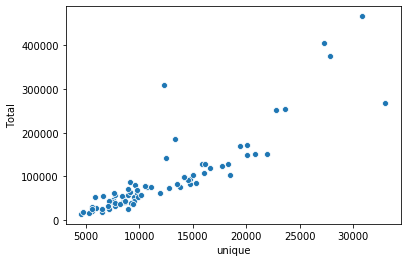

In [194]:
sns.scatterplot(x='unique', y='Total', data=unique)
plt.savefig('Chinese_unique_to_numberofwords')

In [58]:
goethe = mfws.copy()
goethe = goethe[goethe.index.str.contains('Wassermann')]
goethe.loc['Summe'] = goethe.sum()/3
#kafka = kafka.loc['Summe']
goethe = goethe.T[:11]
goethe = goethe.sort_values(by=['Summe'], ascending=False)
goethe

,"Wassermann,-Jakob_Das Gaensemaennchen.txt","Wassermann,-Jakob_Die Juden von Zirndorf.txt","Wassermann,-Jakob_Christian Wahnschaffe.txt",Summe
und,0.037567,0.041872,0.035093,0.038178
die,0.028470,0.029181,0.026641,0.028097
sie,0.023469,0.017378,0.025652,0.022166
der,0.022021,0.023668,0.019897,0.021862
er,0.022058,0.019512,0.020253,0.020607
in,0.015072,0.014862,0.014559,0.014831
zu,0.013080,0.012654,0.012503,0.012746
den,0.012025,0.013049,0.011171,0.012081
das,0.011657,0.012013,0.012225,0.011965
nicht,0.009303,0.008029,0.010852,0.009395


### compare delta values for texts by same and different authors

In [155]:
def same_dif(delta):
    ax = sns.distplot(delta['cosine'][delta['label']=='different'], hist=False, label='different', color=(0.2, 0.3, 0.1))
    ax = sns.distplot(delta['cosine'][delta['label']=='same'], hist=False, label='same', color='g')
    ax.set(ylabel='Count')

    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]
    l2 = ax.lines[1]

    # Get the xy data from the lines so that we can shade
    x1, y1 = l1.get_xydata().T
    x2, y2 = l2.get_xydata().T

    xmin = max(x1.min(), x2.min())
    xmax = min(x1.max(), x2.max())
    x = np.linspace(xmin, xmax, 100)
    y1 = np.interp(x, x1, y1)
    y2 = np.interp(x, x2, y2)
    y = np.minimum(y1, y2)
    ax.fill_between(x, y, color="grey", alpha = 0.3, hatch = '|')
    
    # uncomment to add cutoff border
#     cut = cutoff[cutoff['corpus']==corpus]['delta']
#     plt.axvline(float(cut), 0, 1) 
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_cutoff')

    
    plt.savefig(mfw + '_' + corpus + '_' + 'same_different_deltas')
    plt.legend()
    plt.show()

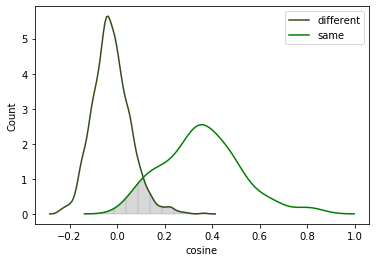

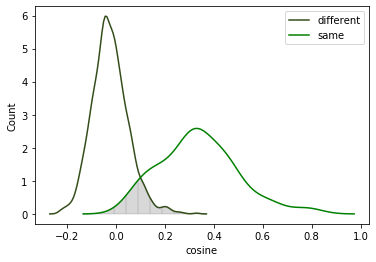

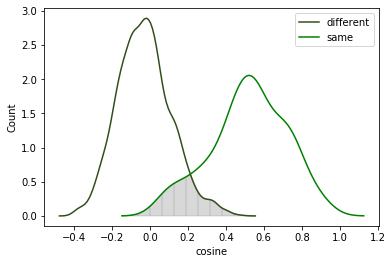

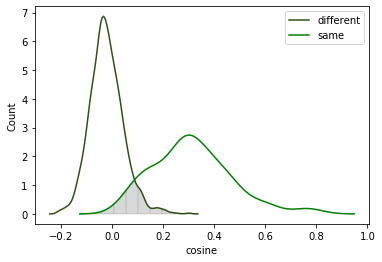

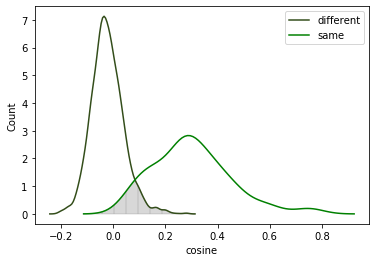

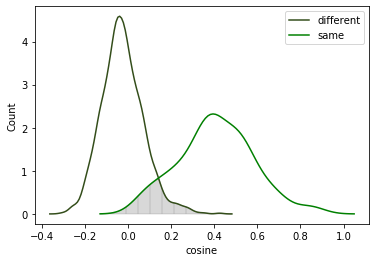

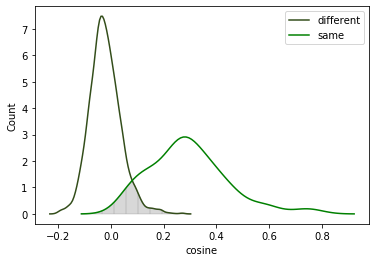

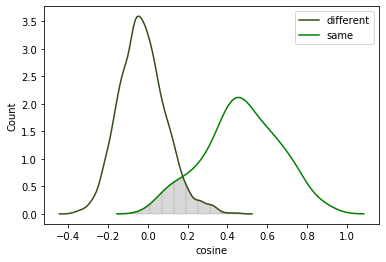

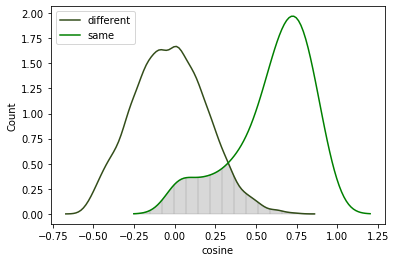

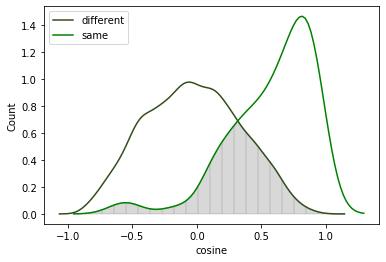

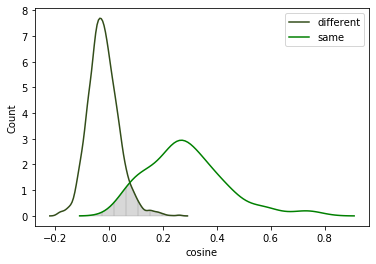

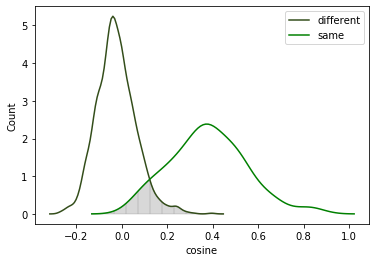

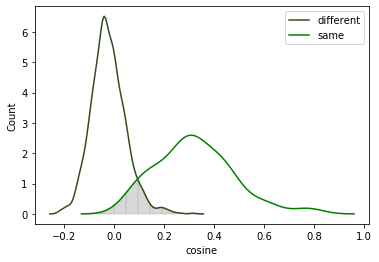

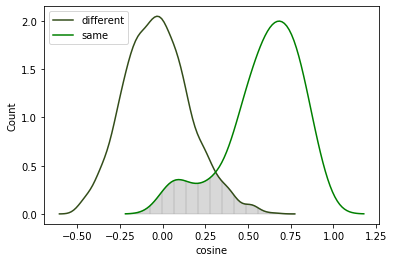

In [156]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


### Delta variance per corpus

In [86]:
var = pd.read_hdf("project_stylometry_statistics/results/Chinese/delta/1000_delta_Chinese.h5")
v = var.copy()
v['corpus'] = 'Chinese'
v = v.drop('manhattan', axis=1)
v = v.drop('euclidean', axis=1)
v = v.drop('label', axis=1)
v = v.drop('author', axis=1)
v = v.reset_index()
v = v.drop('index', axis=1)
v

,manhattan,cosine,euclidean,label,author
"BiShuMin,HuaGuanBingDu,seg.txt",0.00,0.00,0.00,same,BiShuMin
"BiShuMin,LanSeTianTang,seg.txt",589.27,0.49,30.22,same,BiShuMin
"YvQiuyv,ShuangLengChangHe,seg.txt",751.50,0.73,36.28,different,YvQiuyv
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",751.84,0.80,36.84,different,LongYingtai
"YvQiuyv,XingZheWuJiang,seg.txt",758.32,0.76,36.53,different,YvQiuyv
...,...,...,...,...,...
"ZhouRuchang,HongLouShiErCeng,seg.txt",1049.81,1.11,49.20,different,ZhouRuchang
"ZhouGuoping,ShouWangDeJuLi,seg.txt",1050.02,1.13,48.56,different,ZhouGuoping
"ZhouRuchang,HongLouBieYangHong,seg.txt",1057.65,1.10,48.87,different,ZhouRuchang
"ZhouGuoping,LingHunZhiNengDuXing,seg.txt",1066.59,1.13,48.77,different,ZhouGuoping


In [58]:
#variance = pd.DataFrame()
variance = pd.concat([variance, v])
variance = variance[variance['cosine']!=0.00]
variance

,cosine,corpus
1,0.60,piperDE
2,0.75,piperDE
3,0.71,piperDE
4,0.75,piperDE
5,0.78,piperDE
...,...,...
5620,1.11,Chinese
5621,1.13,Chinese
5622,1.10,Chinese
5623,1.13,Chinese


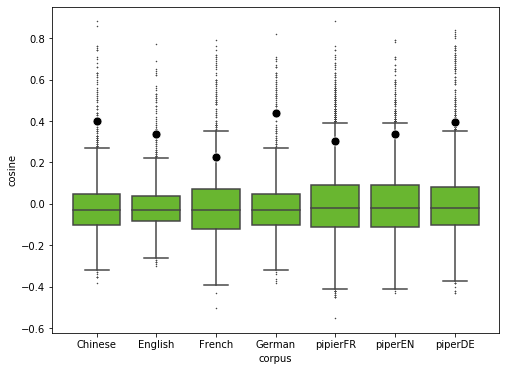

In [68]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='corpus', y='cosine', data=vdelta, color=(0.4, 0.8, 0.1), fliersize=0.5)
ax = sns.scatterplot(x='corpus', y='delta', data=cutoff, color='black', s=80, zorder=10)
plt.ylabel('cosine')
plt.savefig("deltastreuung_plus_deltacutoff")

### Delta normal distribution

In [69]:
cutoff

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500


In [122]:
cos = pd.read_hdf("project_stylometry_statistics/results/piperEN/delta/1000_delta_piperEN.h5")
cos = cos[cos.cosine!=1.00]

In [123]:
plus_same = np.mean(cos[cos['label']=='same']['cosine']) + np.std(cos[cos['label']=='same']['cosine'])
minus_same = np.mean(cos[cos['label']=='same']['cosine']) - np.std(cos[cos['label']=='same']['cosine'])

plus_diff = np.mean(cos[cos['label']=='different']['cosine']) + np.std(cos[cos['label']=='different']['cosine'])
minus_diff = np.mean(cos[cos['label']=='different']['cosine']) - np.std(cos[cos['label']=='different']['cosine'])

print(plus_same, minus_same, plus_diff, minus_diff)

0.6349044754796387 0.18241259769109278 0.1363437076741913 -0.15457682765976777


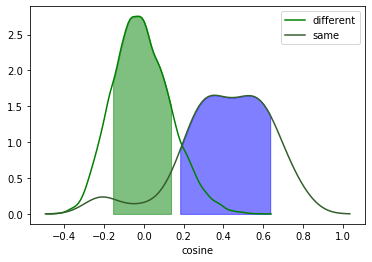

In [124]:
path = "project_stylometry_statistics/results/piperEN/delta/1000_delta_piperEN.h5"
prefix = "project_stylometry_statistics/results/piperEN/delta/"
corpus = 'piperEN'
def distplot(dist):
    ax = sns.distplot(dist['cosine'], hist=False, color='green')
    plt.savefig(mfw + '_' + corpus + '_delta_normaldist')
    plt.show()
    
import re
from scipy import stats


numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

        
        
for file in sorted(glob.glob(path), key=numericalSort):
    dist = pd.read_hdf(file)
    mfw = file.replace(prefix,'').split('_')[0]
    dist = dist[dist['cosine']!=1.00]

    #distplot(dist)
    #sns.set_palette("summer")
    sns.set_palette(sns.cubehelix_palette(14, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
#     ax = sns.distplot(dist['cosine'], hist=False, label=mfw)    #visualise all mfw steps

    #visualise same and different curve for one mfw step with quartile
    ax = sns.distplot(dist[dist['label']=='different']['cosine'], hist=False, label='different', color='g')
    kde = stats.gaussian_kde(dist[dist['label']=='different']['cosine'])
    shade = np.linspace(minus_diff, plus_diff, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='green')
    
    ax = sns.distplot(dist[dist['label']=='same']['cosine'], hist=False, label='same')
    kde = stats.gaussian_kde(dist[dist['label']=='same']['cosine'])
    shade = np.linspace(minus_same, plus_same, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='blue')
    
    
    plt.legend()
plt.savefig(corpus + '_delta_normaldist_quartile_MFW1000')

In [66]:
cutoff = pd.read_csv("project_stylometry_statistics/entire_best_cutoff.csv")

In [21]:
#vdelta = pd.DataFrame()
deltas = pd.read_hdf("project_stylometry_statistics/results/piperDE/delta/500_delta_piperDE.h5")
deltas.drop('manhattan', axis=1, inplace=True)
deltas.drop('euclidean', axis=1, inplace=True)
deltas.drop('label', axis=1, inplace=True)
deltas.drop('author', axis=1, inplace=True)
deltas['corpus']='piperDE'
vdelta=pd.concat([vdelta, deltas])
vdelta

,cosine,corpus
"BiShuMin,HuaGuanBingDu,seg.txt",1.00,Chinese
"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
...,...,...
"Ehrmann,Marianne_Amalie.EinewahreGeschichteinBriefen_Novel.txt",-0.35,piperDE
"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [35]:
vdelta.to_csv("delta_varianz_allekorpora")

In [41]:
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
2,"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
3,"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
4,"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
5,"YvQiuyv,WenHuaKuLv,seg.txt",0.13,Chinese
...,...,...,...
90296,"Ehrmann,Marianne_Amalie.EinewahreGeschichteinB...",-0.35,piperDE
90297,"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
90298,"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
90299,"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [64]:
german = vdelta[vdelta['corpus']=='German']
chinese = vdelta[vdelta['corpus']=='Chinese']
french = vdelta[vdelta['corpus']=='French']
english = vdelta[vdelta['corpus']=='English']
piperDE = vdelta[vdelta['corpus']=='piperDE']
piperFR = vdelta[vdelta['corpus']=='pipierFR']
piperFR.corpus='piperFR'
piperEN = vdelta[vdelta['corpus']=='piperEN']
liste = [german, chinese, french, english, piperDE, piperEN, piperFR]

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


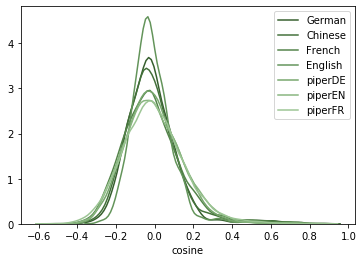

In [65]:
for language in liste:
    corp = np.unique(language['corpus'])[0]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('_delta_normaldist_best_cutoffs')

### Visualize errors

In [9]:
import os

gif_name = 'errors_German'
file_list = glob.glob('project_stylometry_statistics/results/German/errors/*.png') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('/')[4].split('_')[0])) # Sort the images by #, this may need to be tweaked for your use case

with open('image_list.txt', 'w') as file:
    for item in file_list:
        file.write("%s\n" % item)

os.system('convert @image_list.txt {}.gif'.format(gif_name)) # On window

0

### Visualize best cutoff per corpus

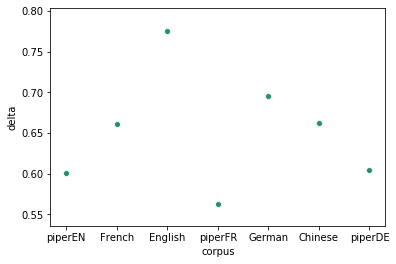

In [475]:
sns.scatterplot(x='corpus', y='delta', data=cutoff)
#sns.scatterplot(x='corpus', y='percentage', data=cutoffs)

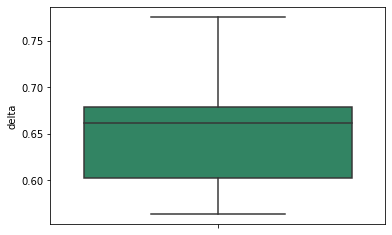

In [476]:
#sns.boxplot(y='percentage', data=cutoffs)
sns.boxplot(y='delta', data=cutoff)
# mit allen Delta Werten des jeweiligen Korpus in Bezug setzen: boxplot von allen Deltas, cutoff markieren?

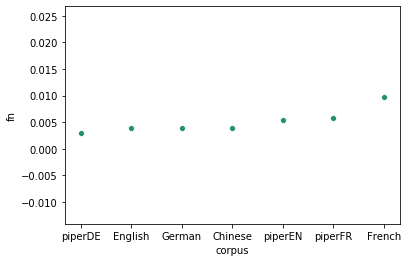

In [477]:
c = cutoff.sort_values(by=['fn'])
sns.scatterplot(x='corpus', y='fn', data=c)
# macht nur im Vergleich mit allen fn Werten Sinn: sind das kleine oder große Abstände?

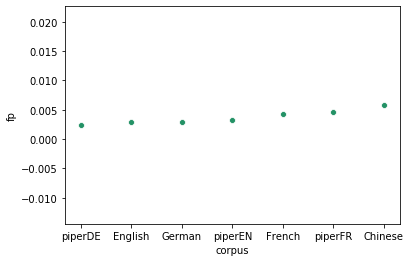

In [480]:
c = cutoff.sort_values(by=['fp'])
sns.scatterplot(x='corpus', y='fp', data=c)

In [157]:
def visualize_cnf_matrix(cnf, cls, percentage):

    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cnf, annot=True, cmap=sns.color_palette("Blues"), ax = ax)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(cls)
    ax.yaxis.set_ticklabels(cls)

    plt.savefig(str(mfw) + '_' + str(corpus) + '_' + str(percentage) + '.png')
    plt.show()

In [158]:
cutoff

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500


In [174]:
cnf = pd.read_csv('project_stylometry_statistics/results/Chinese/errors/1000_errors_Chinese')

cls = ['same', 'different']
corpus = 'Chinese'
percentage = 0.57
mfw = '1000'
#cnf = cnf.drop('Unnamed: 0', axis=1)
cnf = cnf[cnf['percentage']==percentage]
array = [[float(cnf['tn']), float(cnf['fp'])],[float(cnf['fn']), float(cnf['tp'])]]
array

[[0.969009009009009, 0.005765765765765766],
 [0.003963963963963964, 0.021261261261261263]]

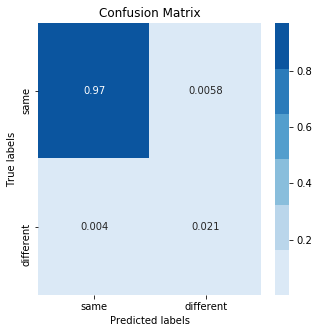

In [175]:
visualize_cnf_matrix(array, cls,percentage)

In [44]:
zscores = pd.read_hdf("project_stylometry_statistics/results/German/zscores/10000_zscore_German.h5")
zscores = zscores.iloc[:,-10:]
zscores

,handlungsweise,vorsätze,türmen,anhielt,gedächtnisse,nöthige,liedes,untersuchungen,weckt,ausübung
"Schopenhauer,-Johanna_Richard Wood.txt",0.241235,-0.528262,-0.545318,-0.632471,0.195553,0.165355,-0.584048,-0.410457,-0.550332,0.239767
"Kafka,-Franz_Amerika.txt",1.640607,0.469060,-0.545318,-0.632471,-0.478795,-0.404842,1.622202,-0.410457,1.529355,-0.585704
"Francois,-Louise-von_Stufenjahre eines Gluecklichen.txt",-0.591044,-0.528262,-0.545318,-0.021760,-0.478795,-0.404842,-0.584048,0.382501,0.513165,-0.585704
"Spielhagen,-Friedrich_Hammer und Amboá.txt",-0.247105,-0.528262,-0.545318,-0.632471,-0.200120,-0.169208,-0.244023,0.067509,-0.550332,-0.244578
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",-0.591044,-0.528262,-0.545318,-0.632471,-0.478795,-0.404842,-0.584048,-0.410457,-0.550332,-0.585704
...,...,...,...,...,...,...,...,...,...,...
"Raabe,-Wilhelm_Im alten Eisen.txt",-0.591044,-0.528262,4.203232,-0.632471,-0.478795,-0.404842,-0.584048,-0.410457,-0.550332,-0.585704
"Lewald,-Fanny_Jenny.txt",-0.591044,1.222305,-0.545318,-0.632471,-0.478795,4.291542,1.352231,0.269991,-0.550332,0.385572
"Raabe,-Wilhelm_Stopfkuchen Eine See- und Mordgeschichte.txt",-0.591044,-0.528262,-0.545318,0.944521,-0.478795,-0.404842,-0.584048,-0.410457,-0.550332,0.875670
"Schopenhauer,-Johanna_Die Tante.txt",-0.591044,-0.528262,-0.545318,0.185099,0.140132,0.641829,-0.584048,-0.410457,-0.550332,-0.585704
